Dataset loaded successfully!
Shape: (4240, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 

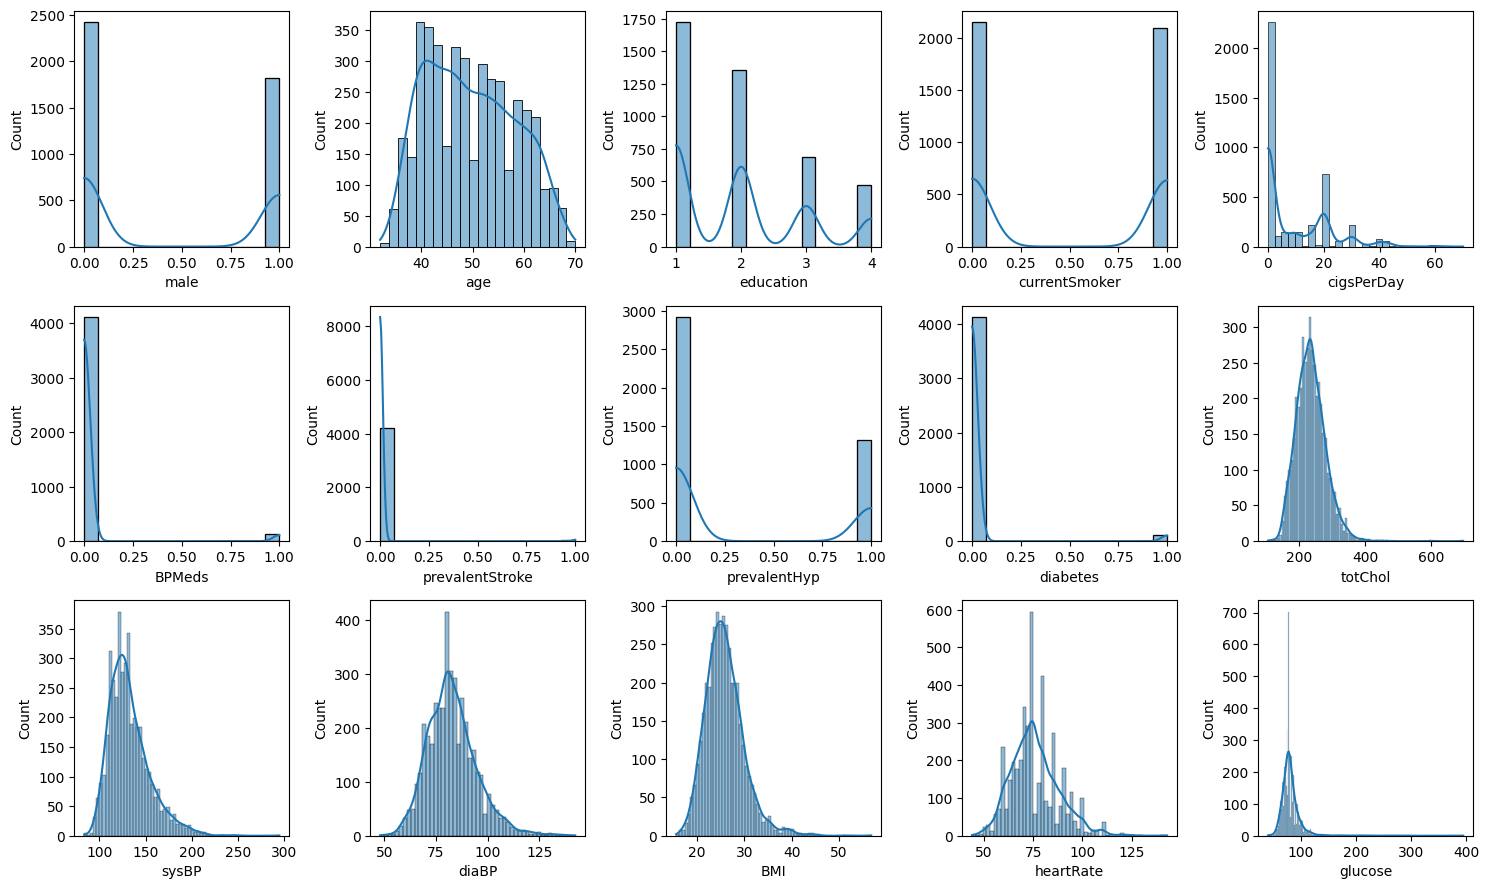

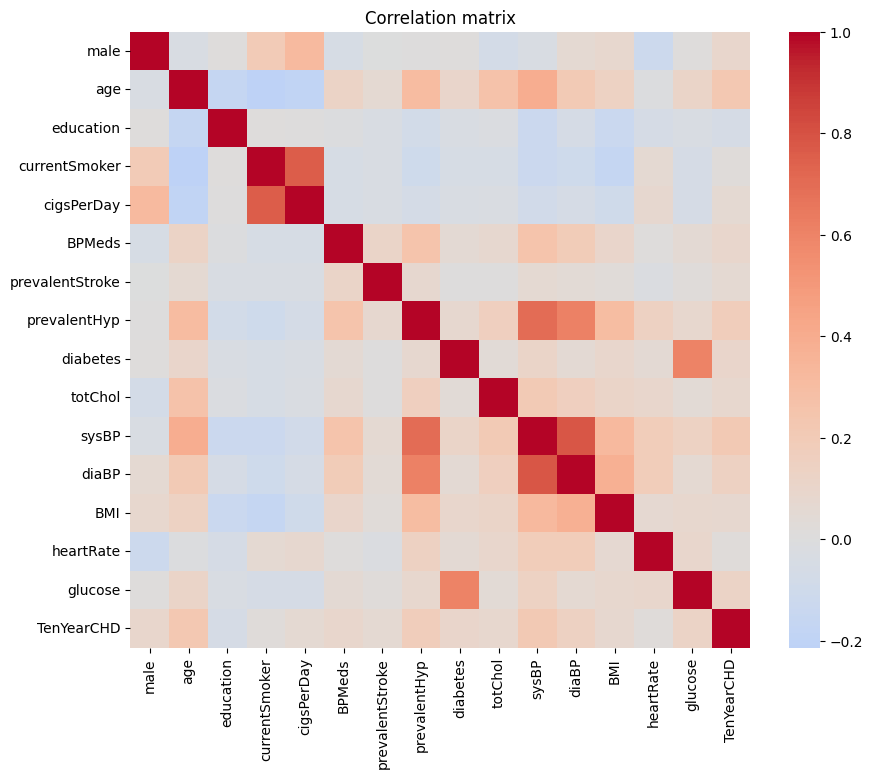


Data split complete:
Train set: (3392, 15), Test set: (848, 15)
Clean dataset saved to ../data/processed/framingham_clean.csv

--- Summary statistics ---


,count,mean,std,min,25%,50%,75%,max
male,4240.0,-1.206582e-16,1.000118,-0.867217,-0.867217,-0.867217,1.153113,1.153113
age,4240.0,1.256856e-16,1.000118,-2.050902,-0.884303,-0.067685,0.748934,2.382172
education,4240.0,-7.541138e-17,1.000118,-0.973172,-0.973172,0.019908,1.012988,2.006069
currentSmoker,4240.0,-1.005485e-17,1.000118,-0.988276,-0.988276,-0.988276,1.011863,1.011863
cigsPerDay,4240.0,-2.513713e-17,1.000118,-0.751412,-0.751412,-0.751412,0.928784,5.129274
BPMeds,4240.0,-2.513713e-17,1.000118,-0.173569,-0.173569,-0.173569,-0.173569,5.761384
prevalentStroke,4240.0,-6.703233e-18,1.000118,-0.077014,-0.077014,-0.077014,-0.077014,12.984606
prevalentHyp,4240.0,6.032910e-17,1.000118,-0.671241,-0.671241,-0.671241,1.489778,1.489778
diabetes,4240.0,1.340647e-17,1.000118,-0.162437,-0.162437,-0.162437,-0.162437,6.156223
totChol,4240.0,-1.022243e-16,1.000118,-2.925500,-0.691910,-0.060187,0.571535,10.363236


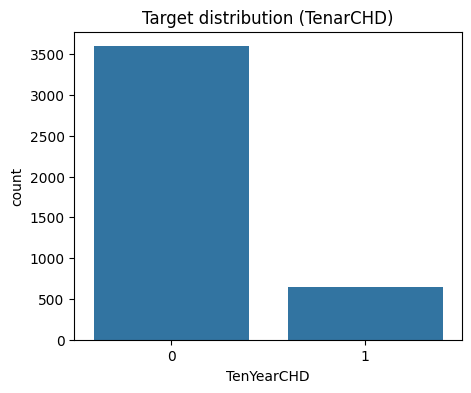

✅ Preprocessing completed successfully!


In [7]:
# =========================================================
# Preprocessing pipeline for the Framingham Heart Study dataset
# =========================================================

# === 1. Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# === 2. Load the dataset ===
file_path = "../data/raw/framingham.csv"
df = pd.read_csv(file_path)

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
display(df.head())

# === 3. Basic info ===
print("\n--- Dataset Info ---")
df.info()

print("\n--- Missing values per column ---")
print(df.isnull().sum())

# === 4. Handle missing values ===
# Strategy: fill numeric NaNs with column median (common for medical data)
df = df.fillna(df.median(numeric_only=True))

print("\nMissing values after imputation:")
print(df.isnull().sum().sum(), "missing values total")

# === 5. Feature overview ===
target = "TenYearCHD"
numeric_features = [col for col in df.columns if col != target]

# Quick distributions plot
fig, axs = plt.subplots(3, 5, figsize=(15, 9))
axs = axs.flatten()
for i, col in enumerate(numeric_features[:15]):
    sns.histplot(df[col], kde=True, ax=axs[i])
plt.tight_layout()
plt.show()

# === 6. Correlation matrix ===
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation matrix")
plt.show()

# === 7. Encode categorical variables (if any) ===
# 'male' is binary, already numeric; education is ordinal, leave as is.
# If there were non-numeric columns, encode them here.

# === 8. Scale numeric features ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_features])
X_scaled = pd.DataFrame(X_scaled, columns=numeric_features)

# Reattach the target column
df_scaled = X_scaled.copy()
df_scaled[target] = df[target].values

# === 9. Split dataset for downstream tasks ===
X = df_scaled.drop(columns=[target])
y = df_scaled[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData split complete:")
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

# === 10. Save processed data ===
processed_path = "../data/processed/framingham_clean.csv"
df_scaled.to_csv(processed_path, index=False)

print(f"Clean dataset saved to {processed_path}")

# === 11. Summary statistics ===
print("\n--- Summary statistics ---")
display(df_scaled.describe().T)

# === 12. Target distribution ===
plt.figure(figsize=(5, 4))
sns.countplot(x=target, data=df_scaled)
plt.title("Target distribution (TenarCHD)")
plt.show()

print("✅ Preprocessing completed successfully!")
